### Stock Market Prediction And Forecasting Using Stacked LSTM

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [47]:
df=pd.read_csv('/content/GOOGL_2006-01-01_to_2018-01-01.csv')

In [48]:
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
1,2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2,2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
3,2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
4,2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [49]:
df.tail()

,Date,Open,High,Low,Close,Volume,Name
3014,2017-12-22,1070.00,1071.72,1067.64,1068.86,889446,GOOGL
3015,2017-12-26,1068.64,1068.86,1058.64,1065.85,918767,GOOGL
3016,2017-12-27,1066.60,1068.27,1058.38,1060.20,1116203,GOOGL
3017,2017-12-28,1062.25,1064.84,1053.38,1055.95,994249,GOOGL
3018,2017-12-29,1055.49,1058.05,1052.70,1053.40,1180340,GOOGL


In [50]:
df1=df.reset_index()['Close']

In [51]:
df1.head(10)

,Close
0,217.83
1,222.84
2,225.85
3,233.06
4,233.68
5,235.11
6,236.05
7,232.05
8,233.36
9,233.79


In [52]:
df1.shape

(3019,)

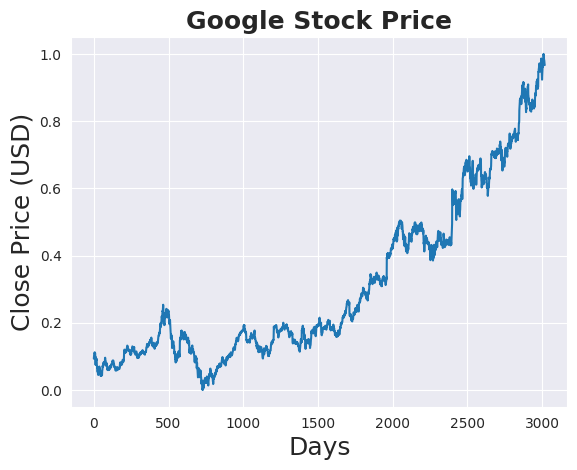

In [116]:
sns.set_style("darkgrid")
plt.plot(df1)
plt.title("Google Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [56]:
df1

,Close
0,217.83
1,222.84
2,225.85
3,233.06
4,233.68
...,...
3014,1068.86
3015,1065.85
3016,1060.20
3017,1055.95


In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [58]:
df1

array([[0.09305195],
       [0.09829122],
       [0.10143897],
       ...,
       [0.97397097],
       [0.96952648],
       [0.96685978]])

In [59]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [60]:
training_size,test_size

(2113, 906)

In [61]:
train_data

array([[0.09305195],
       [0.09829122],
       [0.10143897],
       ...,
       [0.45485443],
       [0.46643102],
       [0.46180875]])

In [62]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   #i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [63]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [64]:
print(X_train.shape), print(y_train.shape)

(2012, 100)
(2012,)


(None, None)

In [65]:
print(X_test.shape), print(ytest.shape)

(805, 100)
(805,)


(None, None)

In [66]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import LSTM

In [70]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [71]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,101 (203.52 KB)

 Trainable params: 52,101 (203.52 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 158ms/step - loss: 0.0068 - val_loss: 8.0581e-04
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - loss: 3.6082e-04 - val_loss: 9.7385e-04
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 164ms/step - loss: 3.3723e-04 - val_loss: 7.6004e-04
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 162ms/step - loss: 3.4292e-04 - val_loss: 0.0010
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - loss: 2.8786e-04 - val_loss: 7.5407e-04
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 151ms/step - loss: 2.6755e-04 - val_loss: 0.0014
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 180ms/step - loss: 2.5420e-04 - val_loss: 0.0012
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 155ms/step - loss: 2.6315e-04 - val_loss: 0.0012
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 138ms/step - loss: 2.3934e-04 - val_loss: 7.3183e-04
Epoch 10/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 165ms/step - loss: 2.0984e-04 - val_loss: 7.9467e-04
Epoch 11/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 167ms/step - loss:

In [74]:
model.save('model.h5')

In [75]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


In [76]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [77]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

313.24446103373555

In [110]:
math.sqrt(mean_squared_error(ytest,test_predict))

749.3720755797249

In [83]:
X_train.shape

(2012, 100, 1)

In [85]:
train_predict.shape

(2012, 1)

In [87]:
len(test_data)

906

In [89]:
x_input=test_data[806:].reshape(1,-1)
x_input.shape


(1, 100)

In [90]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [91]:
temp_input

[0.8483539697147162,
 0.8311093449343263,
 0.837906801639756,
 0.8471513427591402,
 0.8462624445745841,
 0.852735714883293,
 0.8353655985944952,
 0.8338178699907974,
 0.8282648707437466,
 0.8486886137371372,
 0.8509683761398814,
 0.8450179871162053,
 0.8383355642934829,
 0.8358571070024263,
 0.84382581778633,
 0.8520664268384508,
 0.8642077302769182,
 0.8608090019242034,
 0.8498180373128088,
 0.8503827491006444,
 0.8586129005270644,
 0.8497448339329041,
 0.8517108675646283,
 0.8552246298000503,
 0.8591880699406009,
 0.8484062578432194,
 0.8433447670040994,
 0.8375512423659335,
 0.8449866142391034,
 0.8561553584874091,
 0.8561658161131098,
 0.8516794946875264,
 0.8422885468083328,
 0.8455826989040409,
 0.8690809838534261,
 0.8742156780724506,
 0.8835334225717395,
 0.8769974065088264,
 0.8818183719568311,
 0.8762758303354807,
 0.8955283192503976,
 0.9043650129674561,
 0.902974148749268,
 0.8982577595582699,
 0.9169246214339497,
 0.9169246214339497,
 0.9192462143394966,
 0.920793942943194

In [92]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.88045394]
101
1 day input [0.83110934 0.8379068  0.84715134 0.84626244 0.85273571 0.8353656
 0.83381787 0.82826487 0.84868861 0.85096838 0.84501799 0.83833556
 0.83585711 0.84382582 0.85206643 0.86420773 0.860809   0.84981804
 0.85038275 0.8586129  0.84974483 0.85171087 0.85522463 0.85918807
 0.84840626 0.84334477 0.83755124 0.84498661 0.85615536 0.85616582
 0.85167949 0.84228855 0.8455827  0.86908098 0.87421568 0.88353342
 0.87699741 0.88181837 0.87627583 0.89552832 0.90436501 0.90297415
 0.89825776 0.91692462 0.91692462 0.91924621 0.92079394 0.92251945
 0.92433908 0.91294027 0.91631808 0.89589434 0.89897934 0.90208525
 0.90204342 0.94622689 0.94566218 0.94556806 0.95556555 0.95595248
 0.96329373 0.95564921 0.96580356 0.97197356 0.96091985 0.95718648
 0.95410148 0.95456162 0.94909228 0.96170417 0.94854848 0.94726219
 0.96361792 0.96531206 0.97012256 0.98632143 0.97720238 0.95010667
 0.9488413  0.93723333 0.92342926 0.93151301 0.94523341 0.9576257
 0.96265582 0.96536434 0.9620179  0

In [103]:
day_new=np.arange(1,3020)
day_pred=np.arange(3020,3050)

In [101]:
len(day_new)

3019

In [104]:
len(day_pred)

30

In [95]:
len(df1)

3019

In [96]:
len(lst_output)

30

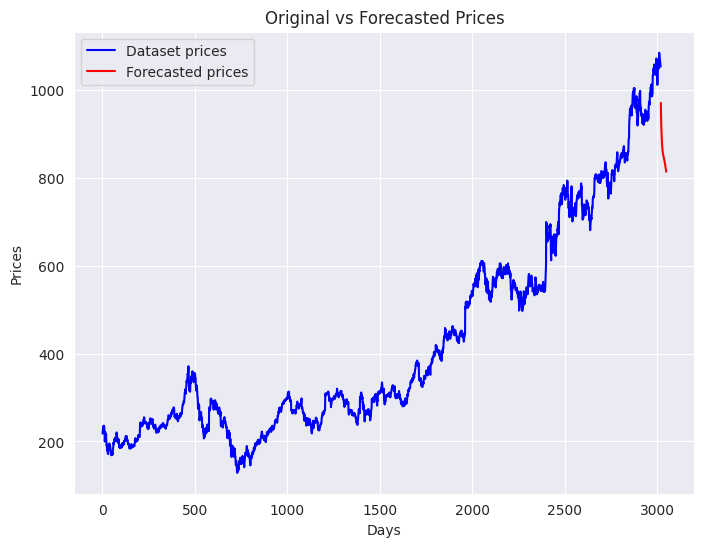

In [115]:
plt.figure(figsize=(8, 6))
plt.plot(day_new, scaler.inverse_transform(df1), label='Dataset prices', color='blue')
plt.plot(day_pred, scaler.inverse_transform(lst_output), label='Forecasted prices', color='red')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.title('Original vs Forecasted Prices')
plt.legend()
plt.grid(True)
plt.show()

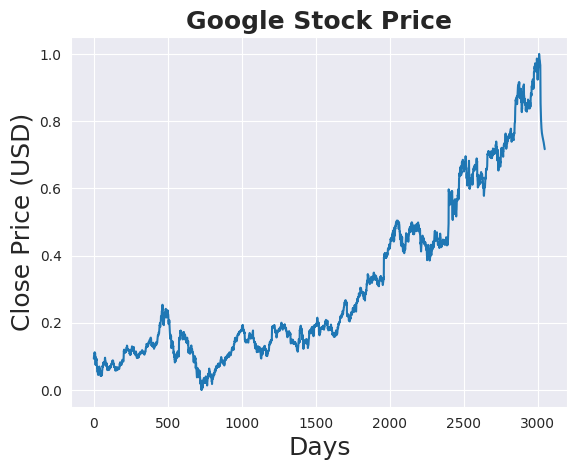

In [117]:
df3=df1.tolist()
df3.extend(lst_output)
sns.set_style("darkgrid")
plt.plot(df3)
plt.title("Google Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()